# Python for Data Science

Imagine there are two suspects who are making an exchange the authorities want to intercept, but getting an agent to the exchange location too soon would make them suspicious.  The data we will use, which is freely available, is about traffic flow and was obtained from data.gov.uk.  Using this data, and the functions provided in `magic.py`, your task is to determine the optimal time that the agent should leave from Southampton and travel up the M3 to Heathrow Airport.

The exercises below are not assessed, but will give you an introduction to using common Python data structures and methods.  There's even a teaser for some statistical content, which will come in useful for week 4!  The code in `magic.py` will also be helpful for you to look at some of the ways a Python script works.

In case you get stuck, the answers are available at [2. Python for Data Science - Answers.ipynb](2.%20Python%20for%20Data%20Science%20-%20Answers.ipynb)
   
   ***Strong suggestion - read the code contained in the 'magic.py' file***

## Exercise 1
**Please run the following code every time before starting the exercise**.  This helps make sure that all the helper functions are in place.  You can run code by pressing `Crtl` + `Enter`, or `Shift` + `Enter` if you want to move onto the next cell.

In [8]:
from magic import *
import pandas as pd

## Exercise 2a
Compute the amount of time it will take to get from Southampton to Heathrow using data from the first observed time (07:00).  Use the `get_arrival_time` function in [magic.py](magic.py) to help if you wish.

In [9]:
# N.B. model answers to the tasks in the 'Introduction Exercise' may be found in the file 
# `2. Python for Data Science - Answers.ipynb`,  by following the link above
leaving_time = '07:00'

journey_time = get_data(1, 2013, 1, leaving_time)[0] # assign the data to the first week of four arrays

total_journey_time = 0

print('link\ttime taken (s)\tacc totals (s)')

for d in journey_time:
    time_taken = journey_time[d]
    total_journey_time += time_taken
    print(d,'\t', time_taken, '\t', total_journey_time)
  
print('arrival_time: %s' %total_journey_time)

### END ANSWER


link	time taken (s)	acc totals (s)
1 	 190.32 	 190.32
2 	 158.85 	 349.16999999999996
3 	 223.14 	 572.31
4 	 93.21 	 665.52
5 	 99.45 	 764.97
6 	 1342.67 	 2107.6400000000003
7 	 87.55 	 2195.1900000000005
8 	 264.51 	 2459.7000000000007
9 	 257.65 	 2717.350000000001
10 	 387.22 	 3104.5700000000006
11 	 310.45 	 3415.0200000000004
12 	 623.01 	 4038.0300000000007
13 	 716.88 	 4754.910000000001
arrival_time: 4754.910000000001


## EXERCISE 2b: 
Generalise your result so you are calculating the arrival time assuming you're leaving every 15 minutes between 05:00 to 09:00.  

Using the code from EXERCISE 2a, create a function `calculate_arrivals`, which calculates the output for any provided inputs.  The function should contain the parameters:
- `weekday` An integer, the day of the week
- `year` An integer between 2012 and 2014 inclusive
- `month` An integer between 1 and 12 inclusive
- `leaving_time` A string in the format HH:MM, e.g., 07:00

There are usually four weeks in the month, and the order of the data are not guaranteed, so you should not attempt to accurately determine the date at this point.  The data returned will be for the first instance of the `weekday` found in the month

In [19]:
# Copy your answer from EXERCISE 1a here, and make it into a function called "calculate_arrivals".  
# Use that to complete this exercise

def calculate_arrivals(weekday, year, month, leaving_time):
    journey_data = get_data(weekday, year, month, leaving_time)[0]
    
    total_journey_time = 0
    
    for d in journey_data:
        time_per_link = journey_data[d]
        total_journey_time += time_per_link
    return get_arrival_time(leaving_time, total_journey_time)

leaving_time = '05:00'

print('departure time\tarrival time')

for lt in range(0, 17):#this is 4x4 = 16, 4, 4 x 15mins in one hour and 4 hours between 5 - 9 
    arr = calculate_arrivals(4, 2014, 3, leaving_time)
    print('leaving time: %s arriving: %s' % (leaving_time, arr))
    leaving_time = get_next_time(leaving_time)

get_next_time('05:12')

get_next_time??
### END ANSWER

departure time	arrival time
leaving time: 05:00 arriving: 05:46:21
leaving time: 05:15 arriving: 05:59:11
leaving time: 05:30 arriving: 06:14:15
leaving time: 05:45 arriving: 06:28:56
leaving time: 06:00 arriving: 06:45:58
leaving time: 06:15 arriving: 07:04:46
leaving time: 06:30 arriving: 07:25:02
leaving time: 06:45 arriving: 07:45:03
leaving time: 07:00 arriving: 08:07:47
leaving time: 07:15 arriving: 08:23:46
leaving time: 07:30 arriving: 08:34:13
leaving time: 07:45 arriving: 08:46:13
leaving time: 08:00 arriving: 08:58:36
leaving time: 08:15 arriving: 09:09:22
leaving time: 08:30 arriving: 09:21:09
leaving time: 08:45 arriving: 09:37:49
leaving time: 09:00 arriving: 09:49:32


## EXERCISE 2c: 
Using the solution you produced for EXERCISE 2b, calculate the estimated arrival time for any day in the first week for the first six months, in a single year (2012 - 2014 inclusive).  Return the results as a dictionary in the format:

`{leaving_time: [list of arrival times]}`, e.g. `{'08:15': ['08:57:04', '09:16:28', ...]}`

N.B. This might take a while to run!  Build your solution gradually, so that when you test your code, it doesn't run the entire dataset.

In [25]:
# weekday == any day, week == 1, months == 6, year = 2012 - 2013
# there a 6 1st weeks * 7days in a week = 42
# result = {} with an array of values

def estimated_arrival_time():
    arrive_dict = {}
    for w in range(1, 8): #weekdays 1-7
        for y in range (2012, 2013): #year 2012
            for m in range(1, 7): #months 1-6
                
                leaving_time = '05:00'  
                for lt in range(17):# 0 to n-1, lets take this to 
                    arr = calculate_arrivals(w, y, m, leaving_time)
                    
                    if not leaving_time in arrive_dict:
                        arrive_dict[leaving_time] = []
                    arrive_dict[leaving_time].append(arr)
                    
                    leaving_time = get_next_time(leaving_time)
    return arrive_dict

arrive_dict = estimated_arrival_time()

for arr_d in arrive_dict:
    print('leaving at time: %s\narriving at time: %s\n' %(arr_d, str(arrive_dict[arr_d])))
    pass 

### END ANSWER

leaving at time: 07:00
arriving at time: ['07:42:02', '08:09:31', '08:06:42', '08:01:16', '07:40:26', '07:42:21', '07:56:20', '07:57:45', '08:04:07', '07:54:02', '08:07:35', '07:43:46', '07:49:20', '07:53:50', '07:54:25', '07:53:59', '07:53:11', '07:56:00', '07:51:53', '07:54:04', '08:06:03', '07:48:02', '08:00:28', '07:49:50', '07:47:37', '07:47:48', '07:50:47', '07:40:43', '07:47:00', '07:46:55', '07:42:25', '07:43:45', '07:43:13', '07:44:27', '07:40:23', '07:43:23', '07:44:45', '07:44:29', '07:41:31', '07:43:28', '07:42:30', '07:46:06']

leaving at time: 05:15
arriving at time: ['06:00:20', '06:00:32', '05:56:38', '05:58:10', '05:58:27', '05:58:22', '06:01:56', '05:58:43', '05:55:13', '05:55:27', '05:58:21', '05:59:01', '05:56:33', '05:57:25', '05:58:15', '06:00:18', '05:58:03', '05:56:30', '06:00:50', '06:00:45', '05:57:08', '05:57:19', '05:58:48', '05:58:52', '05:59:13', '05:59:36', '05:57:04', '05:59:08', '05:58:01', '05:57:52', '05:59:46', '06:01:02', '05:57:40', '05:57:34', '05

## EXERCISE 3

We now have a considerable amount of data, but it's not very easy to read!  On this amount of data it would be cumbersome to perform any calculations manually.  Luckily, Python is good at automating these things employing libraries containing common descriptive statistics methods. We shall be using the NumPy and SciPy libraries.

The data calculated in EXERCISE 2b contains each leaving time, in the first week, of the first six months of a single year.

To calculate the optimal leaving time, we will be using linear regression to perform the analysis.

## EXERCISE 3a
The first step is to determine the mean arrival time for each leaving time for each day in the first week.  

Dealing with time data can be difficult, so to make calculations easier the arrival time is converted into the amount of seconds since midnight. To do this the function `get_time_in_seconds(time_str)` is used which performs this calculation with `time_str` being time in the format HH:MM:SS.

This will return two `array`s for each leaving time (as a string) with the mean arrival time (in seconds), e.g., `{'07:00': 25200}`. This is achieved using the `mean` function from the numpy library. For this to work the `numpy` library of functions must be imported which will allow use a special `numpy` data structure in arrays.  

An array can be created from a list, by running `np.asarray`, as in the example below

In [26]:
#WE NEED TO WORK WITH ARRAYS TO PERFORM MATHEMATICAL FUNCTIONS 
#specialist features of numpy and scipy, a list is a one dimensional array

# You don't have to write anything here

import numpy as np

listy = [1, 2, 3, 4]

array_obj = np.asarray(listy)

print(listy, type(listy))

print(array_obj, type(array_obj))

np.mean(array_obj)


[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


2.5

## EXERCISE 3b

Having calculated the mean values a visualisation of the output can be produced. To do this, we will be using the Python library `pyplot`, which is part of `matplotlib`.  The output visualisation will be a scatterplot which has the leaving time as the predictor variable, and the arrival time as the response variable.  

Use the `plt.scatter` function to create a scatterplot to visualise our times.  This function takes as its first two parameters:

* A list of values for the X axis - predictor value, arrival time
* A list of values for the Y axis - response value, leaving time

In other words the arrival times are used to predict an optimal leaving time.

Use the values obtained from Exercise 3a to do this.

[ 28226.02380952  21525.35714286  20659.02380952  29203.61904762
  25229.38095238  26252.5         35219.85714286  24270.5         34333.57142857
  31816.16666667  31005.64285714  27246.69047619  23356.30952381
  32670.64285714  33479.47619048  30141.47619048  22438.66666667]
[25200 18900 18000 26100 22500 23400 32400 21600 31500 28800 27900 24300
 20700 29700 30600 27000 19800]


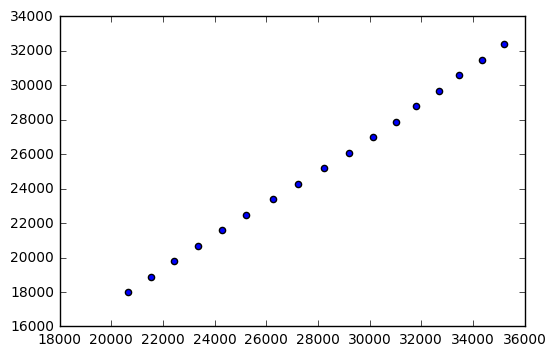

In [31]:
# Do the necessary imports
import matplotlib.pyplot as plt
%matplotlib inline

#leaving time (predictor variable - X axis), arrival time(response variable - Y axis)

#arrival times for the first week of the first 6months dictionary is complex
#calculate the mean to plot

obj_loop = estimated_arrival_time()
departure_values_x = []
response_mean_y = []

for k in obj_loop.keys():
    list_new = []
    response_mean_y.append(get_time_in_seconds(k))
    
    for l in obj_loop[k]:
        list_new.append(get_time_in_seconds(l))
    
    mean = np.mean(np.asarray(list_new))
    departure_values_x.append(mean)
    
departure_values_x = np.asarray(departure_values_x)
response_mean_y = np.asarray(response_mean_y)

print(departure_values_x)
print(response_mean_y)

#notice the printed values are not in order, but they do correlate

#pyplot and inline to plot the results

plt.scatter(departure_values_x, response_mean_y)
#scatter is a function of plt
#these are plotted as arrays

### END ANSWER

## EXERCISE 3c

Having done this, we now need to calculate the regression equation, so we can determine the optimal time for leaving.  The graph may look a bit raw at the moment, but that's okay.  We will fix that soon!

First, we still need to find the equation, plot the line on the graph, and solve it for 09:00.

To solve the equation, we can use the `stats.linregress(first_list, second_list)` in scipy.  Run this now, placing the output into a variable `fx` with the same parameters as you used for the scatter plot, and look at the output:

In [33]:
#having determined the mean value for arrival and departure times in the previous excercises
#now to determine the optimal leaving time
#use linear regression

from scipy import stats

fx = stats.linregress(departure_values_x, response_mean_y)

print("slope\t\t", fx.slope)
print('intercept\t', fx.intercept)

### END ANSWER

slope		 0.975177710149
intercept	 -2166.6360703


use https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data for stats 

The output of the function is an object with different values.  These can be accessed using the dot syntax, i.e., `m = fx.slope`.  We can use these to plot `y = f(x)`, by evaluating `mx + c` as the second parameter in the `plot` function.  Perform the following steps:

* Create a variable `m` from `fx.slope`
* Create a variable `c` from `fx.intercept`
* Plot this equation onto the graph as `plt.plot(leaving_time, m * x + c, '-')`

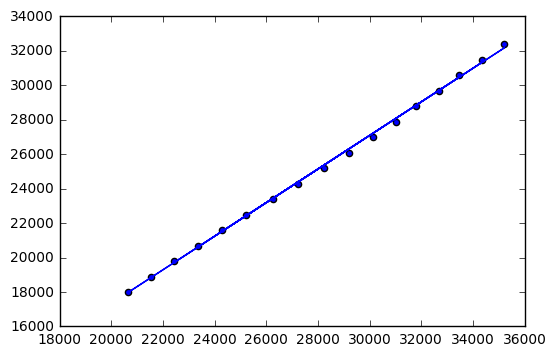

In [35]:

m = fx.slope
c = fx.intercept

plt.scatter(departure_values_x, response_mean_y)

plt.plot(np.asarray(departure_values_x), m * np.asarray(departure_values_x) + c, '-')



### END ANSWER

Now we have a scatter plot, a regression equation, and both are displayed on a graph.  We can use the graph to get an idea for when we should leave, but we can also solve the equation, and this is our next step.  We already have an equation, so we can substitute the values in to get the answer.

All we need to do is:

* Get the value for 09:00 in seconds rather than the more general case used for the plot
* Get the answer from the equationn
* Convert the answer from seconds to a time

In [37]:
# YOUR CODE HERE
y = m * get_time_in_seconds('09:00') + c
print(get_time_in_str(y))


### END ANSWER

08:10


## EXERCISE 4 (Optional)

We have an answer, so we could go home.  However, we need to show this to our manager, so ideally we'll get the graph to look a bit better.  Here are some improvements you could make.  Reading documentation about functions is an important skill, so the instructions here are brief and you are expected to read through the documentation at the links.  If you have trouble, try [StackOverflow](https://stackoverflow.com), or ask one of the demonstrators.

* Label the chart and the axes [docs](http://matplotlib.org/users/pyplot_tutorial.html#id3)
* Change the range of the axes using `xlim` and `ylim` [docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim)
* Change the axes from seconds to a datetime string.  For this we use `xticks` and `yticks` functions, which require an array of labels, e.g., `['07:00', '07:15'.....]` [docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks)
* Increase the size of the plot.  You will need to specify a `plt.figure` before drawing the plot.  This will specify `figsize=(width,height)` as as parameter
* Look at other examples of customisations you can use, for example [here](http://chrisalbon.com/python/data_visualization/matplotlib_simple_scatterplot/)

### Another Solution?

There are many ways you could try and solve this problem.  We chose linear regression as an example.  If you've finished this, try and think of another way to solve it, and implement that instead!